# Regulisation 
* Helps to improve the model

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
data1 = pd.read_csv("D:\Data Science\Datasets\Housing.csv")
data1.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_10388\3554915409.py:1: SyntaxWarning: invalid escape sequence '\D'
  data1 = pd.read_csv("D:\Data Science\Datasets\Housing.csv")


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


Check is we can apply lenier regression 
* Check if it is highly correlated (through heatmap)

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
data = data.select_dtypes('int64')
data.head(3)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2


<Axes: >

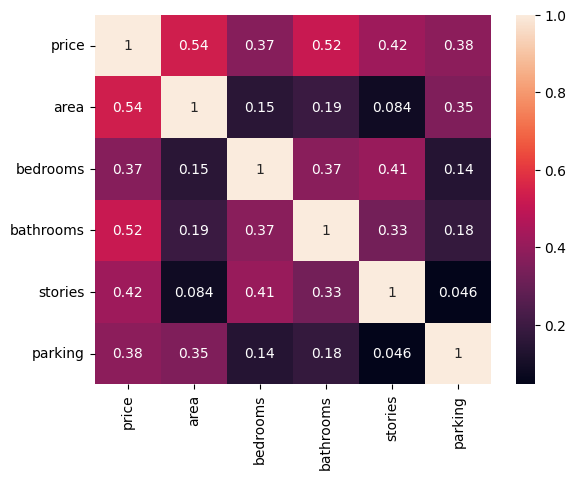

In [21]:
sns.heatmap(data = data.corr(), annot=True)

Still you try linear regression

Now do scalling

In [22]:
x = data.iloc[:, 1:]
y= data['price']

In [26]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns= x.columns)

In [27]:
x

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


In [28]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)

# LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.5030483291611529

* Now we have trained the model
* So we will check how Lasso and Ridge will change the constant and coefficient value


In [32]:
lr.coef_

array([899557.15374246,  93931.67374745, 698228.63376565, 240622.77665701,
       365522.56656567])

TypeError: 'str' object is not callable

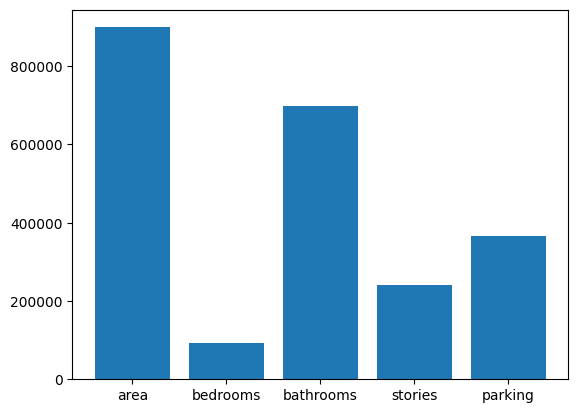

In [46]:
plt.bar(x.columns, lr.coef_)
plt.title("Linear regression")
plt.xlabel('columns')
plt.ylabel('coef')
plt.sho()

# Lasso
* We use lasso for feature selection 

In [51]:
la = Lasso(alpha=1)
la.fit(x_train, y_train)
la.score(x_test, y_test)

0.5030485012817564

TypeError: 'str' object is not callable

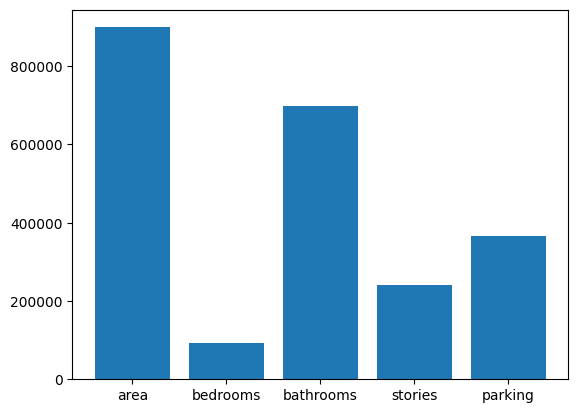

In [53]:
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel('columns')
plt.ylabel('coef')
plt.sho()

# Ridge

In [74]:
ri = Ridge(alpha =10) #alpha is a hyperparametre
ri.fit(x_train, y_train)
ri.score(x_test, y_test)

0.5206446587570623

TypeError: 'str' object is not callable

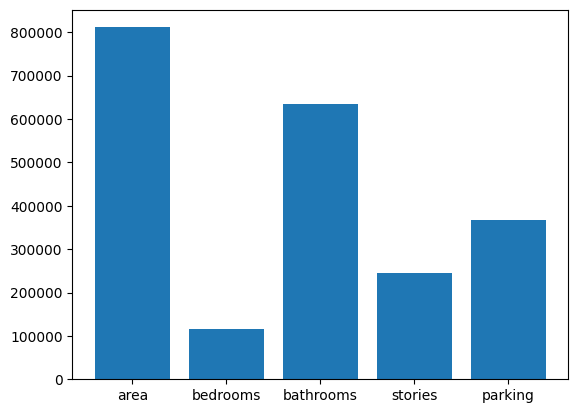

In [56]:
plt.bar(x.columns, ri.coef_)
plt.title("Lasso")
plt.xlabel('columns')
plt.ylabel('coef')
plt.sho()

Now we will look at the errors

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [64]:
print("For Linear Regression")
print("Mean sqaure error: ", mean_squared_error(y_test, lr.predict(x_test)))
print('MAE: ',mean_absolute_error(y_test, lr.predict(x_test)))
print("Root MSE: ", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

For Linear Regression
Mean sqaure error:  1731730028314.8525
MAE:  995365.9904379647
Root MSE:  1315952.137547127


In [65]:
print("For Lasso")
print("Mean sqaure error: ", mean_squared_error(y_test, la.predict(x_test)))
print('MAE: ',mean_absolute_error(y_test, la.predict(x_test)))
print("Root MSE: ", np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

For Lasso
Mean sqaure error:  1731729428525.306
MAE:  995365.8771279597
Root MSE:  1315951.9096552525


In [67]:
print("For Ridge")
print("Mean sqaure error: ", mean_squared_error(y_test, ri.predict(x_test)))
print('MAE: ',mean_absolute_error(y_test, ri.predict(x_test)))
print("Root MSE: ", np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

For Ridge
Mean sqaure error:  1670412008600.9336
MAE:  977912.284847738
Root MSE:  1292444.1994147885


Lot of error we have got

In [73]:
df = pd.DataFrame({'Col_name': x.columns, "Linear Regression": lr.coef_, 'Lasso': la.coef_, 'Ridge': ri.coef_})
df

,Col_name,Linear Regression,Lasso,Ridge
0,area,899557.153742,899556.296958,811363.573667
1,bedrooms,93931.673747,93931.504962,116335.546255
2,bathrooms,698228.633766,698228.110734,633698.796880
3,stories,240622.776657,240622.265938,243995.313068
4,parking,365522.566566,365522.011121,366108.947508
